In [2]:
from sklearn import datasets
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [3]:
oliv = datasets.fetch_olivetti_faces()

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to C:\Users\mc277\scikit_learn_data


In [4]:
oliv.data.shape, oliv.images.shape

((400, 4096), (400, 64, 64))

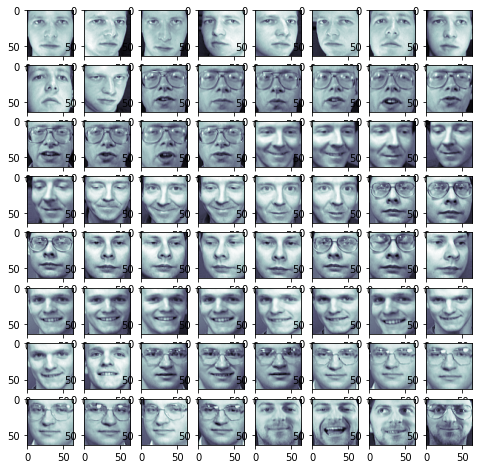

In [6]:
fig = plt.figure(figsize = (8,8))
for i in range(64):
    ax = fig.add_subplot(8,8,i+1)
    ax.imshow(oliv.images[i] , cmap = plt.cm.bone)
plt.show()

In [7]:
x = oliv.data
y = oliv.target

In [8]:
pca = PCA()
pca.fit(x)

PCA()

In [9]:
pca.components_.shape

(400, 4096)

In [11]:
total = sum(pca.explained_variance_)
k, cur_var = 0, 0
while cur_var/total < 0.95:
    cur_var += pca.explained_variance_[k]
    k += 1
k

123

In [12]:
pca = PCA(n_components=k)
x_transformed = pca.fit_transform(x)
x_transformed.shape

(400, 123)

In [15]:
x_approx = pca.inverse_transform(x_transformed)
x_approx.shape

(400, 4096)

In [20]:
x_approx_images = x_approx.reshape((400, 64, 64))
x_approx_images.shape

(400, 64, 64)

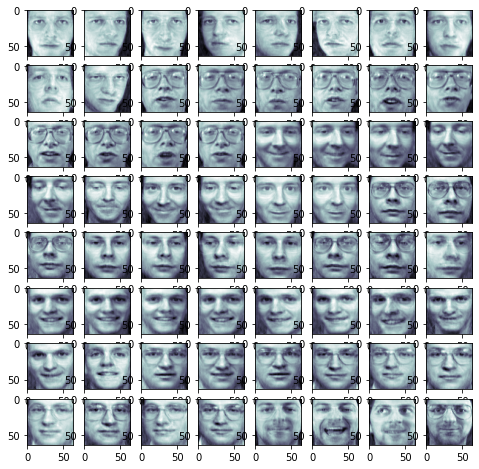

In [21]:
fig = plt.figure(figsize = (8,8))
for i in range(64):
    ax = fig.add_subplot(8,8,i+1)
    ax.imshow(x_approx_images[i] , cmap = plt.cm.bone)
plt.show()

In [23]:
eigenv = pca.components_
eigenv.shape

(123, 4096)

In [25]:
eigenfaces = eigenv.reshape((123,64,64))
eigenfaces.shape

(123, 64, 64)

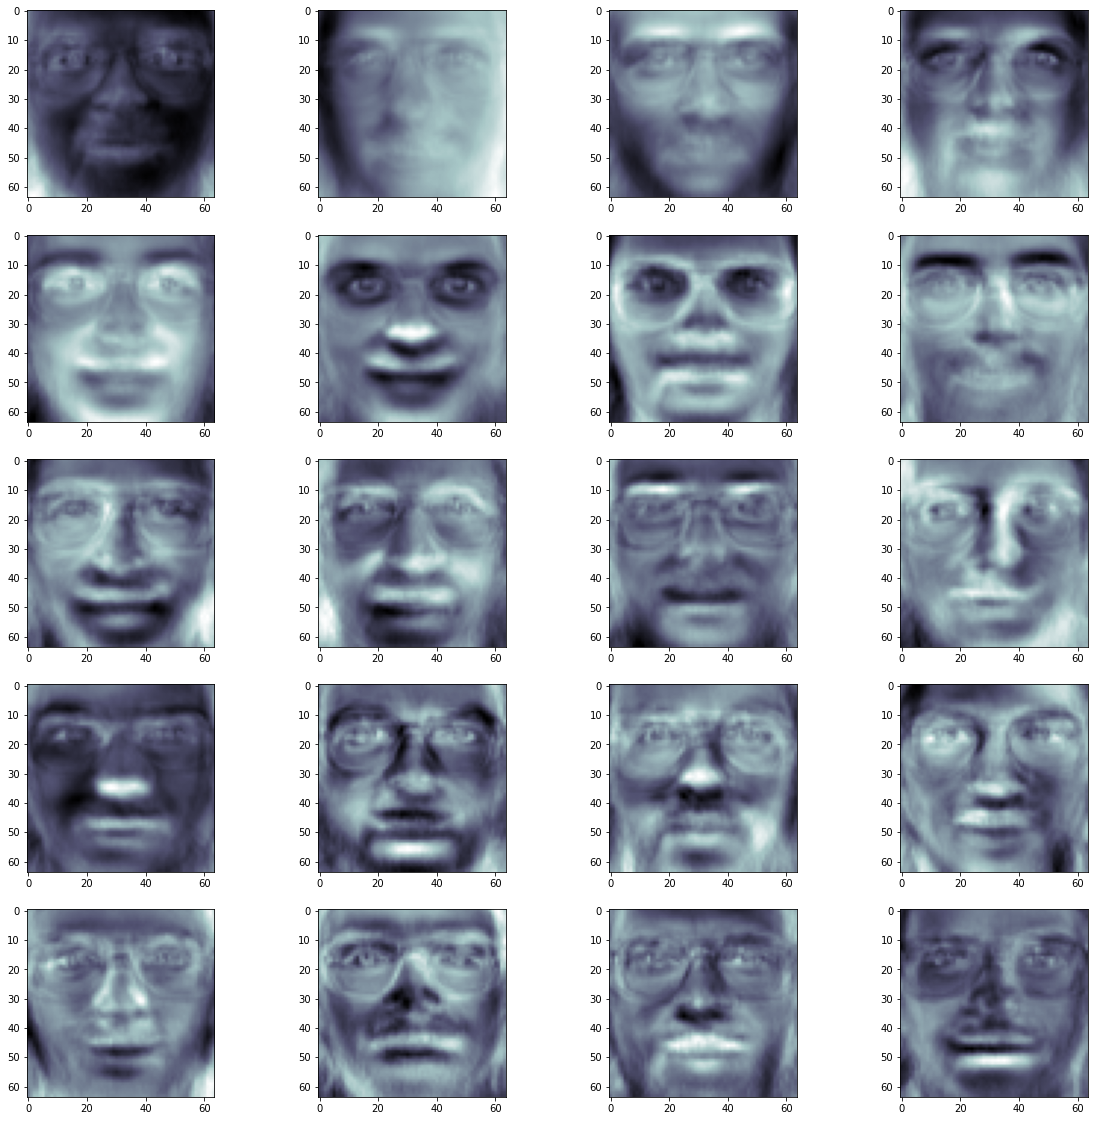

In [40]:
fig = plt.figure(figsize = (20,20))
for i in range(20):
    ax = fig.add_subplot(5,4,i+1)
    ax.imshow(eigenfaces[i] , cmap = plt.cm.bone)
plt.show()